# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Processamento-de-imagens-usando-fatiamento-do-Numpy" data-toc-modified-id="Processamento-de-imagens-usando-fatiamento-do-Numpy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Processamento de imagens usando fatiamento do Numpy</a></div><div class="lev2 toc-item"><a href="#Sobrepondo-reticulado" data-toc-modified-id="Sobrepondo-reticulado-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sobrepondo reticulado</a></div><div class="lev2 toc-item"><a href="#Sobrepondo-frame-preto-na-imagem" data-toc-modified-id="Sobrepondo-frame-preto-na-imagem-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sobrepondo frame preto na imagem</a></div><div class="lev2 toc-item"><a href="#Rotação-90-graus" data-toc-modified-id="Rotação-90-graus-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Rotação 90 graus</a></div><div class="lev2 toc-item"><a href="#Subamostragem" data-toc-modified-id="Subamostragem-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Subamostragem</a></div><div class="lev2 toc-item"><a href="#Ampliação" data-toc-modified-id="Ampliação-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Ampliação</a></div><div class="lev2 toc-item"><a href="#Separando-campos-pares-e-impares-entrelaçados" data-toc-modified-id="Separando-campos-pares-e-impares-entrelaçados-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Separando campos pares e impares entrelaçados</a></div><div class="lev2 toc-item"><a href="#Combinando-duas-imagens-linhas-pares-de-uma-e-ímpares-de-outra" data-toc-modified-id="Combinando-duas-imagens-linhas-pares-de-uma-e-ímpares-de-outra-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Combinando duas imagens linhas pares de uma e ímpares de outra</a></div><div class="lev2 toc-item"><a href="#Montagem-e-reflexão-vertical-e-horizontal" data-toc-modified-id="Montagem-e-reflexão-vertical-e-horizontal-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Montagem e reflexão vertical e horizontal</a></div><div class="lev2 toc-item"><a href="#Translação" data-toc-modified-id="Translação-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Translação</a></div><div class="lev2 toc-item"><a href="#Outros-exemplos" data-toc-modified-id="Outros-exemplos-110"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Outros exemplos</a></div>

# Processamento de imagens usando fatiamento do Numpy

Uma introdução sobre como representar, ler e exibir imagens no Adessowiki podem ser vista em:
 
- `master:tutorial_img_ds Representação, Leitura e Visualização de Imagens no Adessowiki`.

O conceito de fatiamento (slicing) do Numpy é um dos mais importantes para processamento de imagens, tanto
pela sua versatilidade como pela sua eficiência. Reunimos nesta página um conjunto de processamento de
imagens utilizando quase que exclusivamente operações de fatiamento.

Para entender melhor como o fatiamento funciona, recomenda-se ver uma explicação didática do fatiamento:

- `tutorial_numpy_1_2 Fatiamentos unidimensionais`
- `tutorial_numpy_1_3 Fatiamentos bidimensionais`

## Sobrepondo reticulado

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

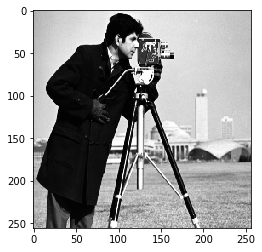

In [3]:
f = mpimg.imread('../data/cameraman.tif')
plt.imshow(f, cmap='gray')

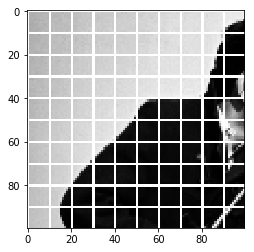

In [4]:
f[::10,:] = 255 # linhas horizontais
f[:,::10] = 255 # linhas verticais
plt.imshow(f[:100,:100],cmap='gray')

## Sobrepondo frame preto na imagem

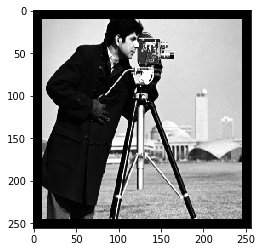

In [5]:
f = mpimg.imread('../data/cameraman.tif')
plt.imshow(f, cmap='gray')
f[   :10,   :  ] = 0 # frame superior
f[-10:  ,   :  ] = 0 # frame inferior
f[   :  ,   :10] = 0 # frame esquerdo
f[   :  ,-10:  ] = 0 # frame direito
plt.imshow(f, cmap='gray')


## Rotação 90 graus

Uma técnica simples para se fazer uma rotação antihorária da matriz, é calcular a matriz transposta e depois
refleti-la na vertical:

original shape=(256, 128)


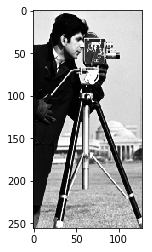

In [6]:
f1 = mpimg.imread('../data/cameraman.tif')
f = f1[:,64:192]
plt.imshow(f,cmap='gray')
print('original shape=%s' % (f.shape,))

transposta shape=(128, 256)


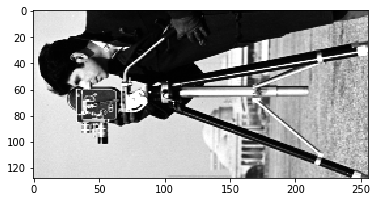

In [7]:
g = f.transpose()
plt.imshow(g, cmap='gray')
print('transposta shape=%s' % (g.shape,))

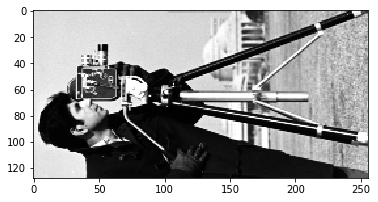

In [8]:
gr = g[::-1,:]
plt.imshow(gr,cmap='gray')
#'reflete na vertical'

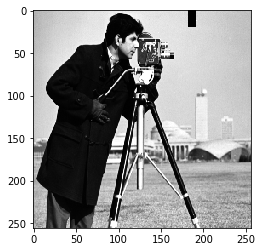

In [9]:
gr[:10,:20] = 0
plt.imshow(f1,cmap='gray')

## Subamostragem

shape=(128, 128)


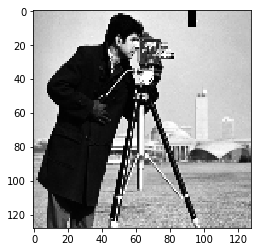

In [10]:
g = f1[::2,::2]
plt.imshow(g, cmap='gray')
print('shape=%s' % (g.shape,) )

## Ampliação

original (50, 80)


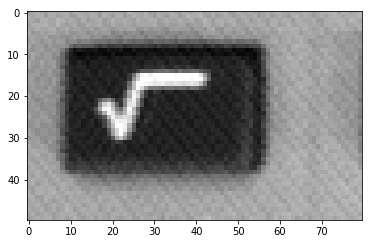

In [31]:
f = mpimg.imread('../data/keyb.tif')[:50,:80]
plt.imshow(f, cmap='gray')
print('original %s' % (f.shape,) )

ampliada por replicação (100, 160)
[[156 156 165 ..., 170 178 178]
 [156 156 165 ..., 170 178 178]
 [173 173 165 ..., 173 181 181]
 ..., 
 [165 165 173 ..., 178 165 165]
 [156 156 165 ..., 173 181 181]
 [156 156 165 ..., 173 181 181]]


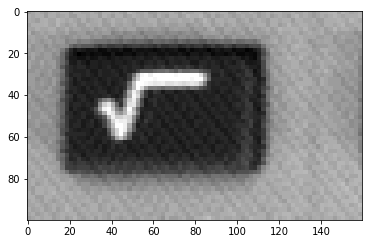

In [32]:
H,W = f.shape
g = np.zeros( (2*H,2*W), 'uint8')
g[ ::2, ::2] = f
g[1::2, ::2] = f
g[1::2,1::2] = f
g[ ::2,1::2] = f
plt.imshow(g, cmap='gray')
print('ampliada por replicação %s' % (g.shape,) )
print(g)

## Separando campos pares e impares entrelaçados

original com dois campos


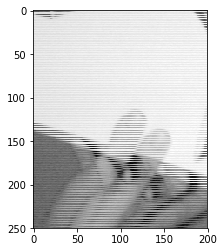

In [13]:
f = mpimg.imread('../data/tvframe.pgm')[100:350,100:300]
plt.imshow(f, cmap='gray')
print('original com dois campos')

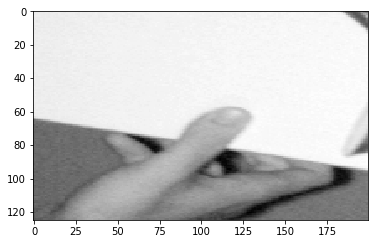

In [14]:
g_par = f[::2,:]
plt.imshow(g_par,cmap='gray')

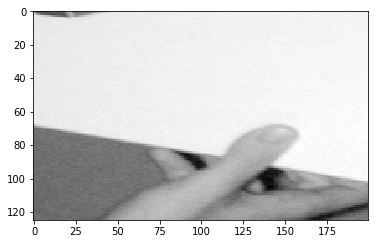

In [15]:
g_impar = f[1::2,:]
plt.imshow(g_impar,cmap='gray')

In [16]:
ns1 = np.array(g_par.shape)
ns = ns1 + np.array([g_impar.shape[0], 0])
print(tuple(ns))

(250, 200)


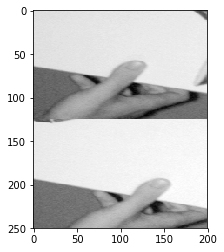

In [17]:
g = np.empty(ns)
g[:g_par.shape[0]] = g_par
g[g_par.shape[0]:] = g_impar
plt.imshow(g,cmap='gray')

Reescrevendo o código para torná-lo mais legível


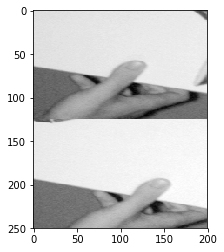

In [18]:
H_par,W_par = g_par.shape
H_impar,W_impar = g_impar.shape
F = np.empty((H_par+H_impar, W_par))
F[:H_par] = g_par
F[H_par:] = g_impar
plt.imshow(F,cmap='gray')

In [19]:
g_even = np.zeros_like(f)
g_even[::2] = f[::2]
g_even[1::2] = f[::2]
print(g_even, 'campo linhas pares')
#adshow(g_even, 'campo linhas pares')

g_odd = np.zeros_like(f)
g_odd[::2]  = f[1::2]
g_odd[1::2] = f[1::2]
#adshow(g_odd, 'campo linhas ímpares')

[[196 196 194 ..., 100  98 105]
 [196 196 194 ..., 100  98 105]
 [195 194 196 ..., 118 112 108]
 ..., 
 [ 84  89  92 ...,  98  99  99]
 [ 79  80  83 ..., 103 104 106]
 [ 79  80  83 ..., 103 104 106]] campo linhas pares


## Combinando duas imagens linhas pares de uma e ímpares de outra

f1: woodlog


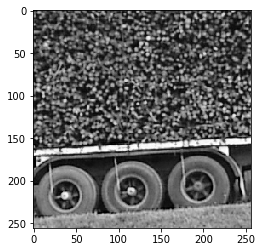

In [20]:
f1 = mpimg.imread('../data/woodlog.tif')
plt.imshow(f1,cmap='gray')
print('f1: woodlog')

f2: keyb


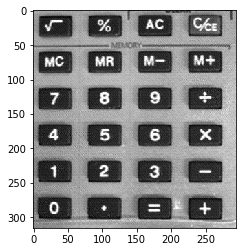

In [21]:
f2 = mpimg.imread('../data/keyb.tif')
plt.imshow(f2,cmap='gray')
print('f2: keyb')

linhas ímpares de f1 e pares de f2


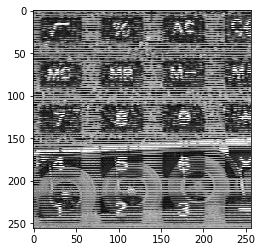

In [22]:
H,W = np.minimum(np.array(f1.shape),np.array(f2.shape))
g = np.empty((H,W))
g[::2,:] = f1[:H:2,:W]
g[1::2,:] = f2[1:H:2,:W]
plt.imshow(g[:,:],cmap='gray')
print('linhas ímpares de f1 e pares de f2')

combinando f1 + f2 usando cálculo em inteiros


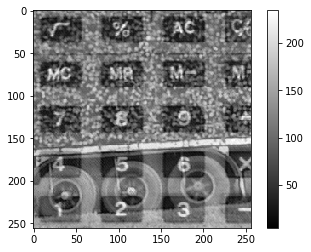

In [23]:
H,W = np.minimum(np.array(f1.shape),np.array(f2.shape))
g = f1[:H,:W]//2 + f2[:H,:W]//2
plt.imshow(g,cmap='gray')
plt.colorbar()
print('combinando f1 + f2 usando cálculo em inteiros')

combinando f1 + f2 usando ponto flutuante


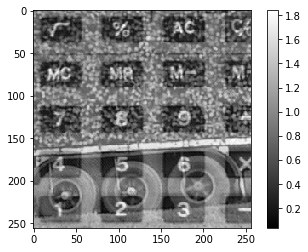

In [24]:
H,W = np.minimum(np.array(f1.shape),np.array(f2.shape))
g = f1[:H,:W]/f1.max() + f2[:H,:W]/f2.max()
plt.imshow(g,cmap='gray')
plt.colorbar()
print('combinando f1 + f2 usando ponto flutuante')

## Montagem e reflexão vertical e horizontal

original


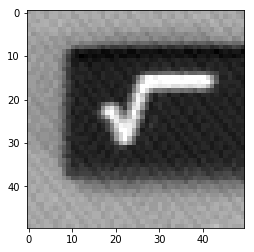

In [25]:
f = mpimg.imread('../data/keyb.tif')[:50,:50]
plt.imshow(f,cmap='gray')
print('original')

refletidas


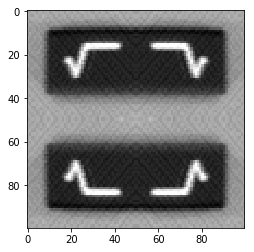

In [26]:
H,W = f.shape
g = np.empty( (2*H,2*W), 'uint8')
g[:H,:W] = f          # original no quadrante superior esquerdo
g[H:,:W] = f[::-1,:]  # refletida vertical no quadrante inferior esquerdo
g[:H,W:] = f[:,::-1]  # refletida horizontal no quadrante superior direito
g[H:,W:] = f[::-1,::-1] # refletida vert. e hor. no quadrante inferior direito
plt.imshow(g,cmap='gray') 
print('refletidas')

## Translação

Uma operação primitiva que é utilizada na construção de várias outras operações é
a translação de uma imagem por um fator de deslocamento na vertical e na horizontal.
Numpy permite fazer translações extremamente eficientes utilizando fatiamento. O 
exemplo abaixo, a imagem **g** é deslocada de (dH,dW).

reticulado de passo 10 pixels


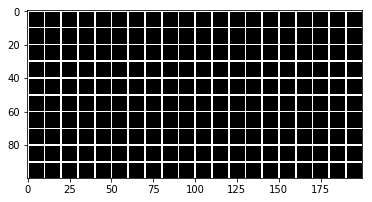

In [27]:
H,W = 100,200
f = np.zeros((H,W),'uint8')
f[::10,:] = 255
f[:,::10] = 255
plt.imshow(f,cmap='gray')
print('reticulado de passo 10 pixels')

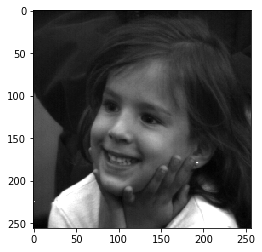

In [28]:
g = mpimg.imread('../data/lenina.pgm')
plt.imshow(g,cmap='gray')

imagem g na origem (0,0)


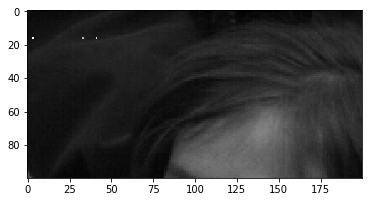

In [29]:
f = g[:H,:W]
plt.imshow(f,cmap='gray')
print('imagem g na origem (0,0)')

In [30]:
dH,dW = (50,100)
f[dH:H+dH,dW:W+dW] = g
adshow(f, 'imagem g deslocada por (%d,%d)' % (dH,dW))

ValueError: could not broadcast input array from shape (256,256) into shape (50,100)

## Outros exemplos

- `ia636:iaprofiledemo` - Ilustração para observar valores de cinza linha vertical na imagem